In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset csv file
df = pd.read_csv('../datasets/forestfires.csv')

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [342]:
# Drop x and y columns
df.drop(['X', 'Y'], axis=1, inplace=True)

df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [343]:
# Start PreProcessing
# Starting with Month Column
df['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [344]:
# Convert month to numerical values but leave the already numerical values
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12})

df['month'].value_counts()



month
8     184
9     172
3      54
7      32
2      20
6      17
10     15
4       9
12      9
1       2
5       2
11      1
Name: count, dtype: int64

In [345]:
# Now drop the day column
df.drop(['day'], axis=1, inplace=True)
df.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [346]:
# check rows count

df.shape

(517, 10)

In [347]:
# drop the rows with feb month

df = df[df['month'] != 2]

df.shape

(497, 10)

In [348]:
# lets check the unique values in the area column
df['area'].value_counts()

area
0.00      237
1.94        3
0.52        2
6.43        2
0.68        2
         ... 
103.39      1
105.66      1
154.88      1
196.48      1
11.16       1
Name: count, Length: 243, dtype: int64

In [349]:
# Convert Area that is >3 to 1 and <=3 to 0 also the fire class to 1 and not fire class to 0 

# Mapping function to convert values
def convert_value(value):
    value = str(value).strip()  # Stripping spaces
    
    if ((float(value)) >3):
        return 1 
    else:
        return 0
# Applying the mapping function to the 'area' column
df['area'] = df['area'].apply(convert_value)

df['area'].value_counts(dropna=False, )

# rename the area column to fire

df.rename(columns={'area': 'Fire'}, inplace=True)

df.head()




,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Fire
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [350]:
df['Fire'].value_counts()





Fire
0    323
1    174
Name: count, dtype: int64

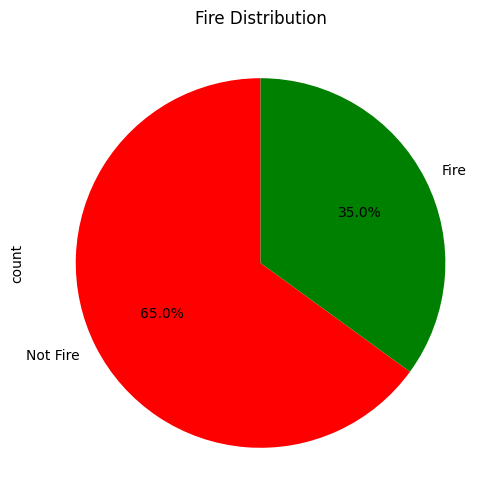

In [351]:
# generate piechart for fire column

plt.figure(figsize=(10, 6))

df['Fire'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'], startangle=90, labels=['Not Fire', 'Fire'])

plt.title('Fire Distribution')
plt.show()


<Figure size 1000x600 with 0 Axes>

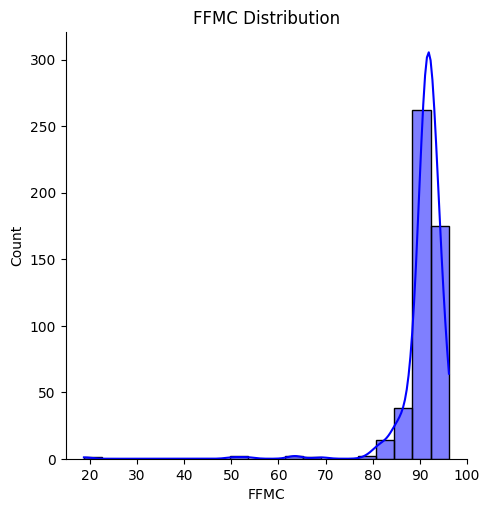

count    497.000000
mean      90.956137
std        5.320063
min       18.700000
25%       90.500000
50%       91.700000
75%       92.900000
max       96.200000
Name: FFMC, dtype: float64
Skewness: -7.5056164995771075


In [352]:
# Now lets check FFMC column
# plot the FFMC column
plt.figure(figsize=(10, 6))
sns.displot(df['FFMC'], bins=20,kde=True, color='blue')
plt.title('FFMC Distribution')
plt.show()

# describe the FFMC column
print(df['FFMC'].describe())


# Check the Skweness of the FFMC column

print('Skewness:', df['FFMC'].skew())


<Figure size 1000x600 with 0 Axes>

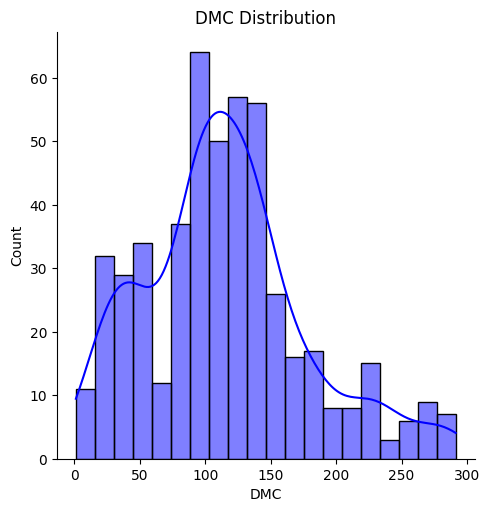

Skewness: 0.6110715085806397


In [353]:

##No Big Skew in the FFMC column
#lets check the Distribution of the DMC column
plt.figure(figsize=(10, 6))
sns.displot(df['DMC'], bins=20,kde=True, color='blue')
plt.title('DMC Distribution')
plt.show()


# Check the Skweness of the FFMC column

print('Skewness:', df['DMC'].skew())


<Figure size 1000x600 with 0 Axes>

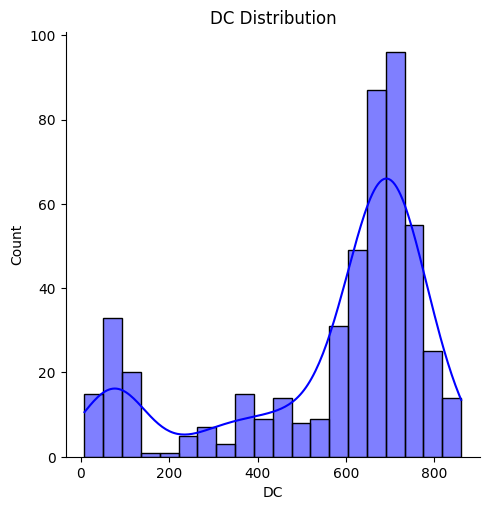

count    497.00000
mean     567.78994
std      231.53745
min        7.90000
25%      480.80000
50%      665.60000
75%      715.10000
max      860.60000
Name: DC, dtype: float64
Skewness: -1.255579067125182


In [354]:

#lets check the Distribution of the DC column
plt.figure(figsize=(10, 6))
sns.displot(df['DC'], bins=20,kde=True, color='blue')
plt.title('DC Distribution')
plt.show()


#Describe the DC column
print(df['DC'].describe())

# Check the Skweness of the DC column

print('Skewness:', df['DC'].skew())


<Figure size 1000x600 with 0 Axes>

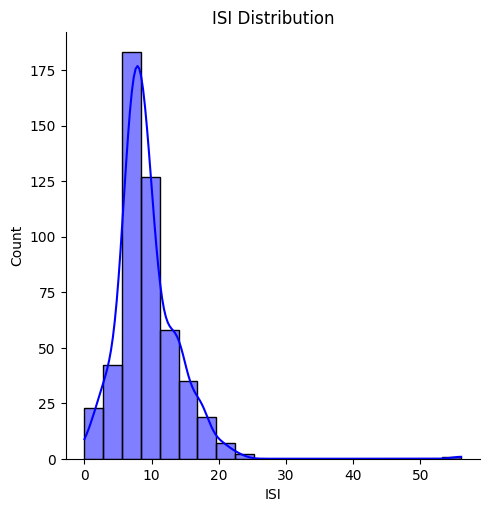

count    497.000000
mean       9.249899
std        4.490784
min        0.000000
25%        6.800000
50%        8.500000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64
Skewness: 2.7091589204205024


<Figure size 1000x600 with 0 Axes>

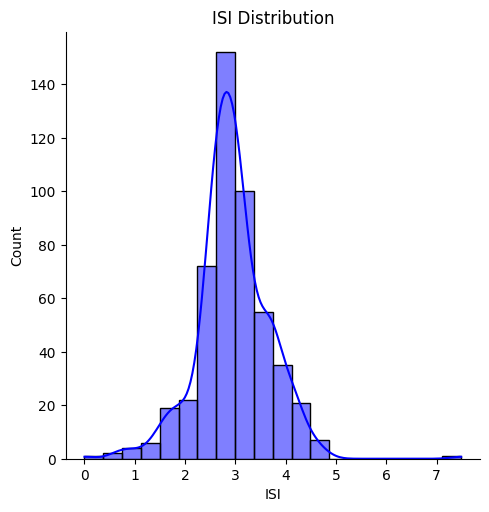

Skewness: 0.21178974594953856


In [355]:

#lets check the Distribution of the ISI column
plt.figure(figsize=(10, 6))
sns.displot(df['ISI'], bins=20,kde=True, color='blue')
plt.title('ISI Distribution')
plt.show()


#Describe the ISI column
print(df['ISI'].describe())

# Check the Skweness of the ISI column

print('Skewness:', df['ISI'].skew())
#skewed ISI, lets apply sqrt transformation to reduce the skewness

df['ISI'] =np.sqrt(df['ISI'] )

#lets check the Distribution of the ISI column
plt.figure(figsize=(10, 6))
sns.displot(df['ISI'], bins=20,kde=True, color='blue')
plt.title('ISI Distribution')
plt.show()

# Check the Skweness of the ISI column

print('Skewness:', df['ISI'].skew())



<Figure size 1000x600 with 0 Axes>

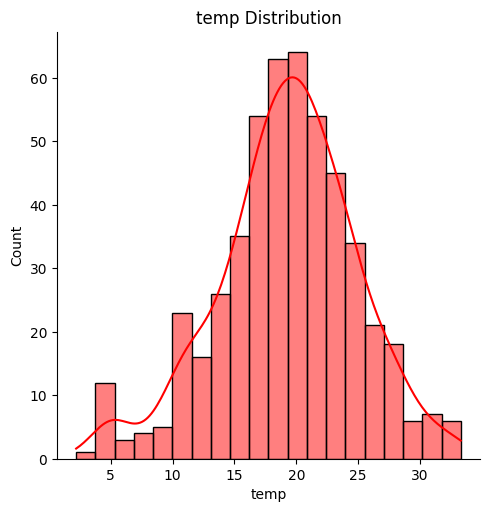

Skewness: -0.3118534415397099


In [356]:


#lets check the Distribution of the temp column
plt.figure(figsize=(10, 6))
sns.displot(df['temp'], bins=20,kde=True, color='red')
plt.title('temp Distribution')
plt.show()


# Check the Skweness of the temp column

print('Skewness:', df['temp'].skew())


<Figure size 1000x600 with 0 Axes>

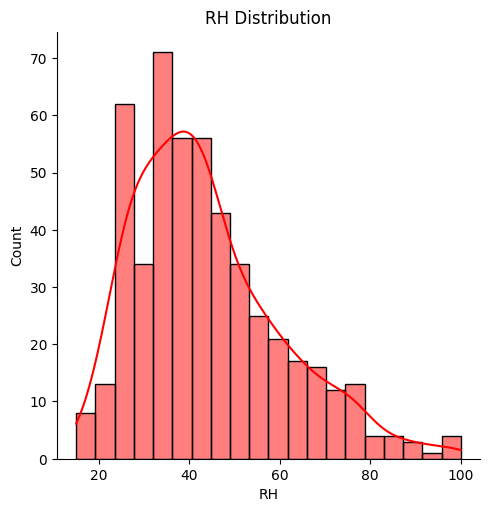

Skewness: 0.9079256762377379


In [357]:


#lets check the Distribution of the RH column
plt.figure(figsize=(10, 6))
sns.displot(df['RH'], bins=20,kde=True, color='red')
plt.title('RH Distribution')
plt.show()


# Check the Skweness of the RH column

print('Skewness:', df['RH'].skew())


<Figure size 1000x600 with 0 Axes>

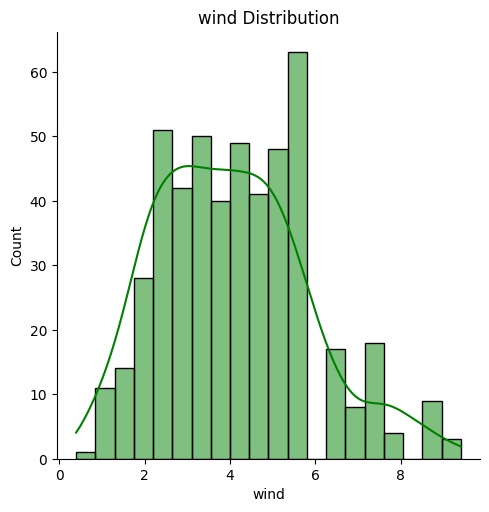

Skewness: 0.550469972582457


In [358]:

#lets check the Distribution of the wind column
plt.figure(figsize=(10, 6))
sns.displot(df['wind'], bins=20,kde=True, color='green')
plt.title('wind Distribution')
plt.show()


# Check the Skweness of the wind column

print('Skewness:', df['wind'].skew())


<Figure size 1000x600 with 0 Axes>

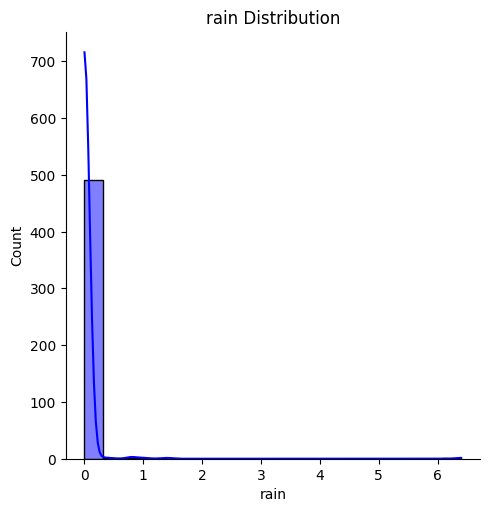

Skewness: 19.429161327140086


In [359]:

#lets check the Distribution of the rain column

plt.figure(figsize=(10, 6))
sns.displot(df['rain'], bins=20,kde=True, color='blue')
plt.title('rain Distribution')
plt.show()


# Check the Skweness of the rain column

print('Skewness:', df['rain'].skew())


### Very skewed, lets apply sqrt transformation to reduce the skewness

<Figure size 1000x600 with 0 Axes>

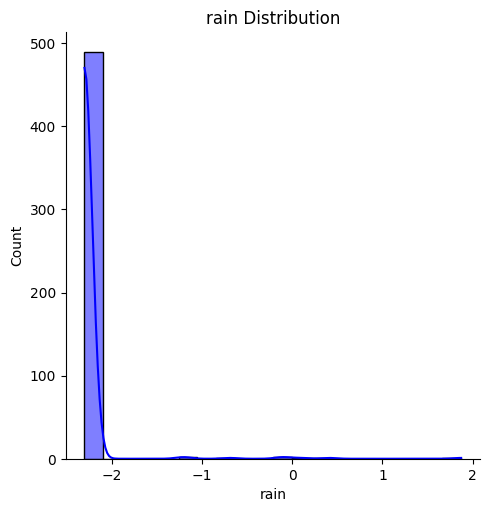

Skewness: 9.752344202622064


,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Fire
0,3,86.2,26.2,94.3,2.258318,8.2,51,6.7,-2.302585,0
1,10,90.6,35.4,669.1,2.588436,18.0,33,0.9,-2.302585,0
2,10,90.6,43.7,686.9,2.588436,14.6,33,1.3,-2.302585,0
3,3,91.7,33.3,77.5,3.000000,8.3,97,4.0,-1.203973,0
4,3,89.3,51.3,102.2,3.098387,11.4,99,1.8,-2.302585,0


In [360]:


# try to apply yeo-johnson transformation
from scipy.stats import yeojohnson, skew


df['rain'] = np.log(df['rain'] + 0.1)


#lets check the Distribution of the rain column
plt.figure(figsize=(10, 6))
sns.displot(df['rain'], bins=20,kde=True, color='blue')
plt.title('rain Distribution')
plt.show()

# Check the Skweness of the rain column

print('Skewness:', df['rain'].skew())


df.head()

In [361]:
X = df.drop('Fire', axis=1)
y = df['Fire']

In [362]:
# RandomForest Model Building and Training 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)



# Model Evaluation



from sklearn.model_selection import cross_val_score


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(rf, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.61       0.62       0.47474747 0.39393939 0.51515152]
Mean cross-validation score:  0.5227676767676768
Standard deviation of the scores:  0.08488141737031969


In [363]:

# Decision Tree Model Building and Training

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, )

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(dt, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.54       0.55       0.47474747 0.37373737 0.41414141]
Mean cross-validation score:  0.47052525252525257
Standard deviation of the scores:  0.06885903556469633


In [364]:

# Logistic Regression Model Building and Training

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=1000)


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(lr, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.64       0.64       0.65656566 0.64646465 0.50505051]
Mean cross-validation score:  0.6176161616161616
Standard deviation of the scores:  0.05660812258769747


c:\Users\BahaaAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [365]:

# KNN Model Building and Training

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(knn, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.59       0.67       0.45454545 0.42424242 0.50505051]
Mean cross-validation score:  0.5287676767676768
Standard deviation of the scores:  0.09021412024219015


In [366]:

# SVM Model Building and Training

from sklearn.svm import SVC

svm = SVC(random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(svm, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.65       0.65       0.65656566 0.64646465 0.64646465]
Mean cross-validation score:  0.64989898989899
Standard deviation of the scores:  0.0036892893672221395


In [367]:

# Gradient Boosting Model Building and Training

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(gb, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.6        0.62       0.47474747 0.42424242 0.44444444]
Mean cross-validation score:  0.5126868686868686
Standard deviation of the scores:  0.08131240604482372


In [368]:

# XGBoost Model Building and Training

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(xgb, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.55       0.61       0.41414141 0.41414141 0.37373737]
Mean cross-validation score:  0.47240404040404044
Standard deviation of the scores:  0.09108013986802918


In [369]:

# Bagging Model Building and Training

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(n_estimators=100, random_state=42)

# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(bag, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.59       0.61       0.44444444 0.43434343 0.48484848]
Mean cross-validation score:  0.5127272727272727
Standard deviation of the scores:  0.07350762603011475


In [370]:

# Naive Bayes Model Building and Training

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(nb, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))


Accuracy scores for each fold:  [0.42       0.56       0.52525253 0.61616162 0.39393939]
Mean cross-validation score:  0.5030707070707071
Standard deviation of the scores:  0.08406297288257261


In [371]:

# Voting Model Building and Training

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('rf', rf),
    ('dt', dt),
    ('lr', lr),
    ('knn', knn),
    ('gb', gb),
    ('xgb', xgb),
    ('bag', bag),
    ('nb', nb),
    ], voting='soft', verbose=True)


# Perform K-Fold cross-validation, typically using 5 or 10 folds
scores = cross_val_score(voting, X, y, cv=5)  # You can adjust the number of folds with the cv parameter

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", np.mean(scores))
print("Standard deviation of the scores: ", np.std(scores))



[Voting] ....................... (1 of 8) Processing rf, total=   0.2s
[Voting] ....................... (2 of 8) Processing dt, total=   0.0s
[Voting] ....................... (3 of 8) Processing lr, total=   0.1s
[Voting] ...................... (4 of 8) Processing knn, total=   0.0s
[Voting] ....................... (5 of 8) Processing gb, total=   0.2s
[Voting] ...................... (6 of 8) Processing xgb, total=   0.1s
[Voting] ...................... (7 of 8) Processing bag, total=   0.3s
[Voting] ....................... (8 of 8) Processing nb, total=   0.0s
[Voting] ....................... (1 of 8) Processing rf, total=   0.2s
[Voting] ....................... (2 of 8) Processing dt, total=   0.0s
[Voting] ....................... (3 of 8) Processing lr, total=   0.1s
[Voting] ...................... (4 of 8) Processing knn, total=   0.0s
[Voting] ....................... (5 of 8) Processing gb, total=   0.2s
[Voting] ...................... (6 of 8) Processing xgb, total=   0.1s
[Votin

c:\Users\BahaaAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ....................... (5 of 8) Processing gb, total=   0.2s
[Voting] ...................... (6 of 8) Processing xgb, total=   0.1s
[Voting] ...................... (7 of 8) Processing bag, total=   0.3s
[Voting] ....................... (8 of 8) Processing nb, total=   0.0s
Accuracy scores for each fold:  [0.59       0.6        0.46464646 0.4040404  0.42424242]
Mean cross-validation score:  0.4965858585858586
Standard deviation of the scores:  0.08275148940702955


In [372]:



# import itertools
# from joblib import Parallel, delayed

# # Assume rf, dt, lr, knn, gb, xgb, bag, nb are already defined as classifiers.
# classifiers = {
#     'rf': rf,
#     'dt': dt,
#     'lr': lr,
#     'knn': knn,
#     'gb': gb,
#     'xgb': xgb,
#     'bag': bag,
#     'nb': nb
# }

# def evaluate_combination(combo):
#     # Check if the combo is a tuple (single classifier case)
#     if isinstance(combo[0], tuple):
#         names, models = zip(*combo)
#     else:
#         names, models = (combo[0],), (combo[1],)  # single classifier
    
#     voting = VotingClassifier(estimators=list(zip(names, models)), voting='hard', verbose=True)
#     scores = cross_val_score(voting, X, y, cv=5)
#     mean_score = np.mean(scores)
#     std_dev = np.std(scores)
#     return {'names': names, 'mean_score': mean_score, 'scores': scores, 'std_dev': std_dev}

# # Using joblib's Parallel and delayed to handle multiprocessing
# results = Parallel(n_jobs=-1)(
#     delayed(evaluate_combination)(combo)
#     for size in range(1, len(classifiers) + 1)  # Now starting from 1 to include single classifiers
#     for combo in itertools.combinations(classifiers.items(), size)
# )

# # Sort results by mean score in descending order
# sorted_results = sorted(results, key=lambda x: x['mean_score'], reverse=True)

# # Print sorted results
# for result in sorted_results:
#     print(f"Combination: {', '.join(result['names'])}")
#     print(f"Accuracy scores for each fold: {result['scores']}")
#     print(f"Mean cross-validation score: {result['mean_score']}")
#     print(f"Standard deviation of the scores: {result['std_dev']}")
#     print()

# # Optionally, print the best combination directly from the sorted list
# if sorted_results:
#     best_result = sorted_results[0]
#     print(f"Best combination: {', '.join(best_result['names'])}")
#     print(f"Best mean cross-validation score: {best_result['mean_score']}")


KeyboardInterrupt: 

In [ ]:


#### We Choose the Combination: rf, knn, xgb that has the Highest Mean CV Score
# Train the best model

# Voting Model Building and Training

# best_voting = VotingClassifier(estimators=[
#     ('rf', rf),
#     ('knn', knn),
#     ('xgb', xgb),
#     ], voting='hard', verbose=True)

# # Fit the model using the whole dataset

# best_voting.fit(X, y)

# from joblib import dump


# dump(best_voting, 'voting_classifier.joblib')

